<a href="https://colab.research.google.com/github/riacode/StanfordAI4ALL/blob/main/Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice Problems
##  Neural Networks

AI4ALL Camp Day 12

## Apply NN on MNIST digit classification

Let's explore neural networks using scikit-learn's Multi-layer Perceptron (basically another name for a neural net). Naturally, we will use the MNIST hand-written digits dataset, which is essentially the "hello world" example for neural network classification.

> Start by importing the dataset. This may take a little while since the dataset is a little larger than the ones we've used in past problems.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
import numpy as np
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

In [ ]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / X.max()

# Partition the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

> Each data point is a 28x28 matrix of grayscale values. Let's visualize this by plotting these values, using the first digit as an example. Feel free to change the index into X to see what other digits are in the dataset.

<Figure size 432x288 with 0 Axes>

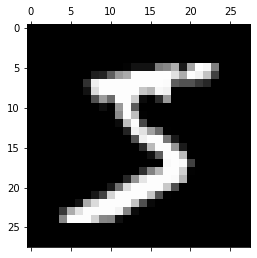

In [ ]:
plt.gray()

# Since each data point is stored in a list of 784 values, we have
# to reshape the list into a 28x28 array.
digit = X[0].reshape(28,28)
plt.matshow(digit)
plt.show()

> Now we can initialize the classifier, train it, and observe how well the classifier works on our test set.

> The `hidden_layer_sizes` parameter accepts a tuple that specifies the number of hidden layers and the number of neurons per layer. The `solver` parameter specifies that we'll use Stochastic Gradient Descent.

> * `hidden_layer_sizes`: The number of hidden layers and number of neurons per layer. For example, the tuple (64, 32, 16) represents 3 hidden layers, with 64, 32, and 16 neurons, respectively.
> * `solver`: The solver for weight optimization. We learned about Stochastic Gradient Descent, so we use that here.
> * `activation`: The activation function for the hidden layers. Possible values are `'identity'`, `'logistic'`, `'tanh'`, and `'relu'`.
> * `max_iter`: The maximum number of iterations (updates) to perform. Ideally, the weights will converge, meaning the updates hardly change the weights. Keeping this value low will prevent the code from taking a long time (but may sacrifice accuracy).

> The setup provided below is not very accurate at predicting on the test set. Go ahead and run the code to see the resulting score.

> Try changing the parameters for the classifier and see how it affects the score. (`solver` needn't be changed since stochastic gradient descent is the only solver we learned about.) For example, which activation function that we mentioned in the lesson may be very effective?

In [ ]:
# Initialize the classifier
mlp_clf = MLPClassifier(
    hidden_layer_sizes=(64,32,16),
    solver='sgd',
    activation='relu',
    max_iter=32
)

# Train the classifier
mlp_clf.fit(X_train, y_train)

# get prediction
y_pred_test = mlp_clf.predict(X_test)

# Get the mean accuracy on the test data and print it
score_train = mlp_clf.score(X_train, y_train)
score_test = mlp_clf.score(X_test, y_test)
print(score_train, score_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (32) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.9580380952380952 0.9495428571428571


#### something you can try:
#### 1. different size of hidden layer
#### 2. increase number of hidden layer
#### 3. different max iter

## Try NN on Leukemia dataset!
#### Don't worry if the accuracy is low, as the number of training data is limited!

In [ ]:
#@title Run this to setup our files and download your data! Upload the 3 leukemia_ALL_AML_<matrix/labels/genes>.txt files

#Import the common libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import io

# Upload the data files
from google.colab import files
uploaded = files.upload()

Saving leukemia_ALL_AML.csv to leukemia_ALL_AML.csv


In [ ]:
#Load our data to a pandas dataframe
data_df = pd.read_csv('leukemia_ALL_AML.csv')

In [ ]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split

In [ ]:
# Break the dataset up into the examples (X) and their labels (y)
X = data_df.drop(columns ="label")
y = data_df.label

# Split up the X and y datasets into train and test sets
# 25% of the dataset will be used for the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [ ]:
# Initialize the classifier
mlp_clf = MLPClassifier(
    hidden_layer_sizes=(64,32,16),
    solver='sgd',
    activation='relu',
    max_iter=32
)

# Train the classifier
mlp_clf.fit(X_train, y_train)

# get prediction
y_pred_test = mlp_clf.predict(X_test)

# Get the mean accuracy on the test data and print it
score_train = mlp_clf.score(X_train, y_train)
score_test = mlp_clf.score(X_test, y_test)
print(score_train, score_test)

0.6666666666666666 0.6111111111111112


# Try NN on Lung Cancer dataset!

In [ ]:
#@title Run this to setup our files and download your data! Upload the 3 leukemia_ALL_AML_<matrix/labels/genes>.txt files

#Import the common libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import io

# Upload the data files
from google.colab import files
uploaded = files.upload()

In [ ]:
data_lung = pd.read_csv('lung_normal_4tumors.csv')

In [ ]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split

In [ ]:
# Break the dataset up into the examples (X) and their labels (y)
X = data_lung.drop(columns ="label")
y = data_lung.label

# Split up the X and y datasets into train and test sets
# 25% of the dataset will be used for the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [ ]:
# Initialize the classifier
mlp_clf = MLPClassifier(
    hidden_layer_sizes=(8),
    solver='sgd',
    activation='identity',
    max_iter=32
)

# Train the classifier
mlp_clf.fit(X_train, y_train)

# get prediction
y_pred_test = mlp_clf.predict(X_test)

# Get the mean accuracy on the test data and print it
score_train = mlp_clf.score(X_train, y_train)
score_test = mlp_clf.score(X_test, y_test)
print(score_train, score_test)

0.7039473684210527 0.6274509803921569


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (32) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
np.isnan(X_train).sum()

38691_s_at     0
37864_s_at     0
33273_f_at     0
33274_f_at     0
33501_r_at     0
              ..
41422_at       0
39964_at       0
36120_at       0
40571_at       0
36312_at       0
Length: 12600, dtype: int64